In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize'] = (24, 12)

In [2]:
data_inicio = '2013-01-01'
data_fim = '2021-09-08'

In [3]:
df = data.DataReader('TSLA', 'yahoo', data_inicio, data_fim)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,7.090000,6.942000,7.000000,7.072000,5974000.0,7.072000
2013-01-03,7.090000,6.950000,7.036000,6.954000,3710000.0,6.954000
2013-01-04,6.960000,6.784000,6.960000,6.880000,3370000.0,6.880000
2013-01-07,6.960000,6.780000,6.960000,6.868000,2210000.0,6.868000
2013-01-08,6.900000,6.622000,6.900000,6.736000,6420000.0,6.736000
...,...,...,...,...,...,...
2021-09-01,741.989990,731.270020,734.080017,734.090027,13204300.0,734.090027
2021-09-02,740.969971,730.539978,734.500000,732.390015,12777300.0,732.390015
2021-09-03,734.000000,724.200012,732.250000,733.570007,15246100.0,733.570007


In [4]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [5]:
steps = 60

In [6]:
X_train = []
Y_train = []
for x in range(steps, len(scaled_data)):
    X_train.append(scaled_data[x - steps: x, 0])
    Y_train.append(scaled_data[x, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [9]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 5

In [11]:
es = EarlyStopping(monitor='loss', mode='min', verbose=1,
                       patience=40, min_delta=0.0001)

validation = model.fit(X_train, Y_train, epochs=25, batch_size=32, verbose=2, callbacks=[es])

Epoch 1/25
67/67 - 6s - loss: 0.0078
Epoch 2/25
67/67 - 3s - loss: 0.0016
Epoch 3/25
67/67 - 3s - loss: 0.0014
Epoch 4/25
67/67 - 3s - loss: 0.0015
Epoch 5/25
67/67 - 3s - loss: 0.0014
Epoch 6/25
67/67 - 3s - loss: 0.0013
Epoch 7/25
67/67 - 3s - loss: 0.0016
Epoch 8/25
67/67 - 3s - loss: 0.0012
Epoch 9/25
67/67 - 3s - loss: 0.0014
Epoch 10/25
67/67 - 3s - loss: 0.0014
Epoch 11/25
67/67 - 3s - loss: 0.0013
Epoch 12/25
67/67 - 3s - loss: 0.0013
Epoch 13/25
67/67 - 3s - loss: 9.9094e-04
Epoch 14/25
67/67 - 3s - loss: 8.9821e-04
Epoch 15/25
67/67 - 3s - loss: 9.5716e-04
Epoch 16/25
67/67 - 3s - loss: 0.0011
Epoch 17/25
67/67 - 3s - loss: 8.9881e-04
Epoch 18/25
67/67 - 3s - loss: 8.3363e-04
Epoch 19/25
67/67 - 3s - loss: 9.7996e-04
Epoch 20/25
67/67 - 3s - loss: 7.0607e-04
Epoch 21/25
67/67 - 3s - loss: 8.2251e-04
Epoch 22/25
67/67 - 3s - loss: 9.2007e-04
Epoch 23/25
67/67 - 3s - loss: 7.9530e-04
Epoch 24/25
67/67 - 3s - loss: 8.3277e-04
Epoch 25/25
67/67 - 3s - loss: 9.0034e-04


In [12]:
# Testing accuracy on existing data
test_start = '2010-01-01'
test_end = '2020-12-31'
df_test = data.DataReader('TSLA', 'yahoo', test_start, test_end)
df_test

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000000,3.508000,3.80000,4.778000,93831500.0,4.778000
2010-06-30,6.084000,4.660000,5.15800,4.766000,85935500.0,4.766000
2010-07-01,5.184000,4.054000,5.00000,4.392000,41094000.0,4.392000
2010-07-02,4.620000,3.742000,4.60000,3.840000,25699000.0,3.840000
2010-07-06,4.000000,3.166000,4.00000,3.222000,34334500.0,3.222000
...,...,...,...,...,...,...
2020-12-24,666.090027,641.000000,642.98999,661.770020,22865600.0,661.770020
2020-12-28,681.400024,660.799988,674.51001,663.690002,32278600.0,663.690002
2020-12-29,669.900024,655.000000,661.00000,665.989990,22910800.0,665.989990


In [13]:
actual_prices_test = df_test['Close'].values

In [14]:
complete_df = pd.concat((df['Close'], df_test['Close']), axis=0)

In [15]:
complete_df

Date
2013-01-02      7.072000
2013-01-03      6.954000
2013-01-04      6.880000
2013-01-07      6.868000
2013-01-08      6.736000
                 ...    
2020-12-24    661.770020
2020-12-28    663.690002
2020-12-29    665.989990
2020-12-30    694.780029
2020-12-31    705.669983
Name: Close, Length: 4834, dtype: float64

In [16]:
model_inputs = complete_df[len(complete_df) - len(df_test) - steps:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

In [17]:
# Predictions on test data
X_test = []
for z in range(steps, len(model_inputs)):
    X_test.append(model_inputs[z-steps:z, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [18]:
predicted_test = model.predict(X_test)
predicted_test = scaler.inverse_transform(predicted_test)

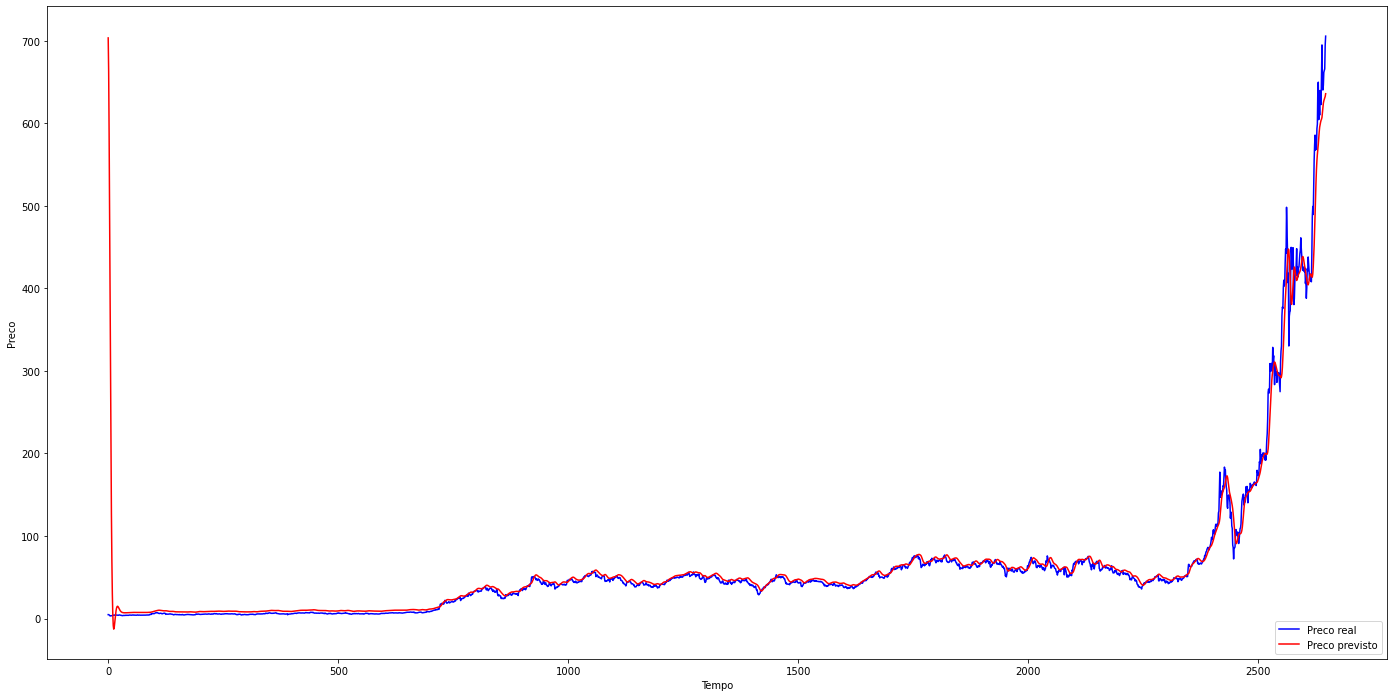

In [19]:
#Plot test prediction
plt.plot(actual_prices_test, color= 'blue', label = 'Preco real')
plt.plot(predicted_test, color = 'red', label = 'Preco previsto')
plt.xlabel('Tempo')
plt.ylabel('Preco')
plt.legend()
plt.show()


In [20]:
# predict d+1

real_df = [model_inputs[len(model_inputs) + 1 - steps:len(model_inputs + 1), 0]]

In [21]:
real_df = np.array(real_df)
real_df = np.reshape(real_df, (real_df.shape[0], real_df.shape[1], 1))
d_plus1 = model.predict(real_df)
d_plus1 = scaler.inverse_transform(d_plus1)
d_plus1

array([[641.64]], dtype=float32)